# Analysis of NHIS Injury Records (2010-2017)

### Deliverable: Analysis of falls(how the person fell and cause of fall) for the following age groups: 55-64, 65-84, and 84+

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Specifying the file path 
file_path = "C:/Users/hari shivani gudi/Downloads/nhis_00003.csv/nhis_00003.csv"
df = pd.read_csv(file_path)
# first 5 rows of the DataFrame
print(df.head())

   YEAR  SERIAL  STRATA  PSU     NHISHID  HHWEIGHT  PERNUM       NHISPID  HHX  \
0  2010      19    6160    1  2010000027      2101       1  2.010000e+13   27   
1  2010      19    6160    1  2010000027      2101       1  2.010000e+13   27   
2  2010      24    6135    2  2010000037      1804       4  2.010000e+13   37   
3  2010      49    6261    2  2010000078      4340       1  2.010000e+13   78   
4  2010      96    6185    1  2010000146      3038       4  2.010000e+13  146   

   FMX  ...  CSTATFLG  AGE  SEX  CVDDIAG  CVDTEST  CVDTESTRSLT  ISERIAL  \
0    1  ...         0   58    1      NaN      NaN          NaN        1   
1    1  ...         0   58    1      NaN      NaN          NaN        2   
2    1  ...         1    6    1      NaN      NaN          NaN        3   
3    1  ...         0   55    1      NaN      NaN          NaN        4   
4    1  ...         1   14    1      NaN      NaN          NaN        5   

   IRFALL1  IRFALL2  IRFALLWHY  
0        0        0          

In [3]:
print(df.isnull().sum()) #null values

YEAR               0
SERIAL             0
STRATA             0
PSU                0
NHISHID            0
HHWEIGHT           0
PERNUM             0
NHISPID            0
HHX                0
FMX                0
PX                 0
PERWEIGHT          0
SAMPWEIGHT         0
LONGWEIGHT     23075
PARTWEIGHT     23075
FWEIGHT            0
ASTATFLG           0
CSTATFLG           0
AGE                0
SEX                0
CVDDIAG        23075
CVDTEST        23075
CVDTESTRSLT    23075
ISERIAL            0
IRFALL1            0
IRFALL2            0
IRFALLWHY          0
dtype: int64


In [4]:
# dropping columns with max null values
columns_to_drop = ['LONGWEIGHT', 'PARTWEIGHT','CVDDIAG','CVDTEST','CVDTESTRSLT']
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
df

,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,PERNUM,NHISPID,HHX,FMX,...,SAMPWEIGHT,FWEIGHT,ASTATFLG,CSTATFLG,AGE,SEX,ISERIAL,IRFALL1,IRFALL2,IRFALLWHY
0,2010,19,6160,1,2010000027,2101,1,2.010000e+13,27,1,...,2825,2659,1,0,58,1,1,0,0,0
1,2010,19,6160,1,2010000027,2101,1,2.010000e+13,27,1,...,2825,2659,1,0,58,1,2,0,0,0
2,2010,24,6135,2,2010000037,1804,4,2.010000e+13,37,1,...,2258,2030,0,1,6,1,3,0,0,0
3,2010,49,6261,2,2010000078,4340,1,2.010000e+13,78,1,...,5564,4979,1,0,55,1,4,0,0,0
4,2010,96,6185,1,2010000146,3038,4,2.010000e+13,146,1,...,11228,3439,0,1,14,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23070,2017,48967,7141,23,2017058767,2751,1,2.017060e+13,58767,1,...,0,2868,2,0,83,2,2647,13,14,7
23071,2017,48967,7141,23,2017058767,2751,1,2.017060e+13,58767,1,...,0,2868,2,0,83,2,2648,9,14,7
23072,2017,48971,7111,1,2017058773,1106,1,2.017060e+13,58773,1,...,3715,1179,1,0,28,2,2649,2,14,1
23073,2017,49027,7140,64,2017058840,8949,1,2.017060e+13,58840,1,...,23607,9330,1,0,85,1,2650,2,14,1


In [6]:
# calculated the weighted average age of the DataFrame 
weighted_average_age = np.average(df['AGE'], weights=df['HHWEIGHT'])
# Grouped by 'SEX' column and calculated the weighted average age for each gender 
weighted_average_age_by_gender = df.groupby('SEX')['AGE'].apply(lambda x: np.average(x, weights=df.loc[x.index, 'HHWEIGHT']))

print("Weighted Average Age:", weighted_average_age)
print("Weighted Average Age by Gender:")
print(weighted_average_age_by_gender) #1-male,2-female


Weighted Average Age: 41.651296282626525
Weighted Average Age by Gender:
SEX
1    38.547273
2    44.549509
Name: AGE, dtype: float64


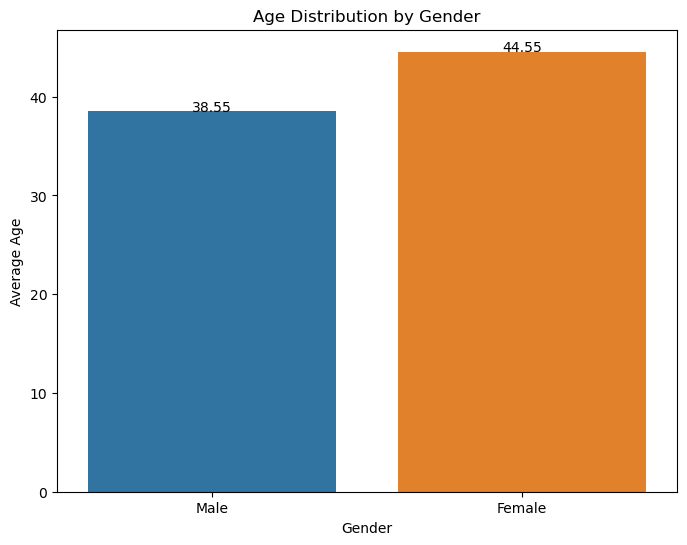

In [7]:
# age categories
age_categories = ["Under 18", "18-29", "30-44", "45-54", "55-64", "65-84", "84+"]

# weighted average age by gender
weighted_average_age_by_gender = df.groupby('SEX')['AGE'].apply(lambda x: np.average(x, weights=df.loc[x.index, 'HHWEIGHT'])).reset_index()

# gender labels
gender_labels = {1: 'Male', 2: 'Female'}
weighted_average_age_by_gender['Gender_Label'] = weighted_average_age_by_gender['SEX'].map(gender_labels)

# bar chart for gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender_Label', y='AGE', data=weighted_average_age_by_gender)
plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.title("Age Distribution by Gender")

for index, row in weighted_average_age_by_gender.iterrows():
    plt.text(row.name, row.AGE, f"{row.AGE:.2f}", color='black', ha="center")

plt.show()


Under 18    5071
30-44       4017
65-84       3419
45-54       3289
55-64       3276
18-29       3274
84+          729
Name: AgeCategory, dtype: int64


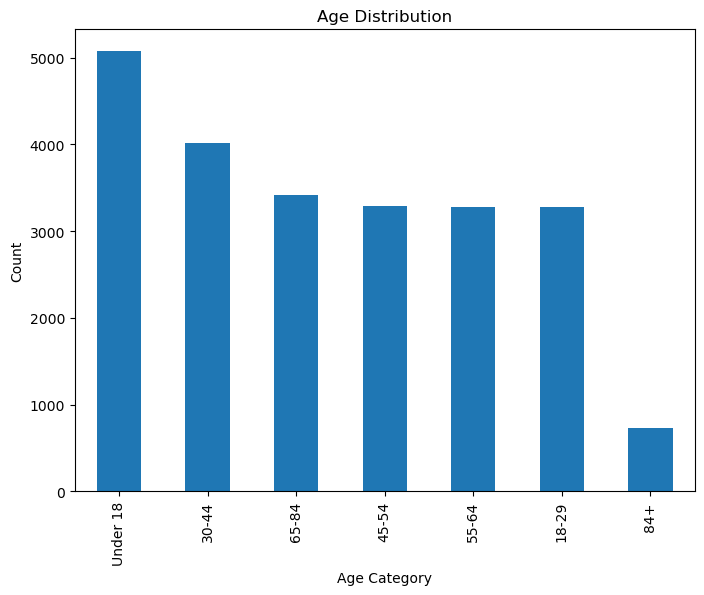

In [8]:
age_bins = [0, 18, 30, 45, 55, 65, 85, float('inf')]
age_labels = ["Under 18", "18-29", "30-44", "45-54", "55-64", "65-84", "84+"]

# new column 'AgeCategory' based on the age bins
df['AgeCategory'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# distribution of AgeCategory
age_category_counts = df['AgeCategory'].value_counts()
print(age_category_counts)


plt.figure(figsize=(8, 6))
age_category_counts.plot(kind='bar')
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()




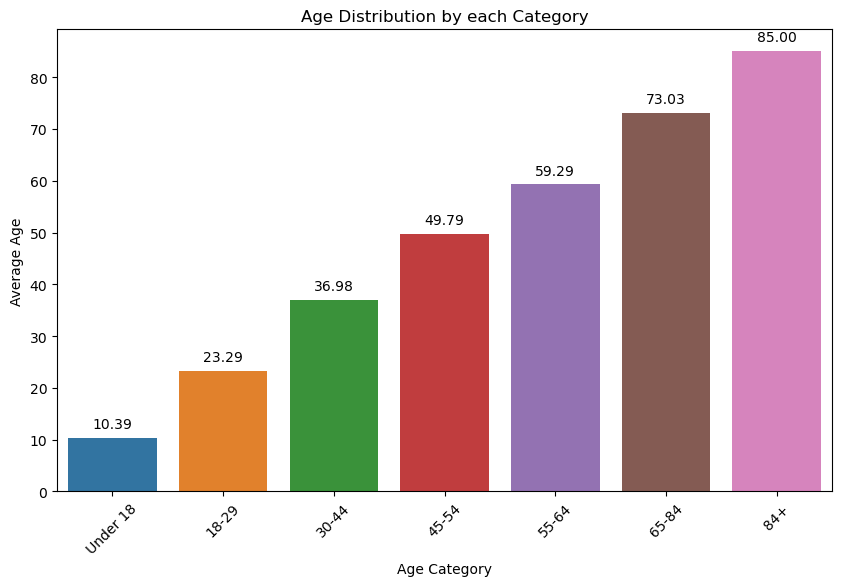

In [9]:
# Age categories
age_categories = ["Under 18", "18-29", "30-44", "45-54", "55-64", "65-84", "84+"]

# weighted average age for each age category
weighted_average_age_by_category = df[df['AgeCategory'].isin(age_categories)].groupby('AgeCategory')['AGE'].apply(lambda x: np.average(x, weights=df.loc[x.index, 'HHWEIGHT']))

# Pandas DataFrame to store the weighted average age by age category
weighted_age_category_df = pd.DataFrame({'Category': weighted_average_age_by_category.index, 'Value': weighted_average_age_by_category.values})

# bar chart for the weighted average age by age category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Value', data=weighted_age_category_df)
plt.xlabel("Age Category")
plt.ylabel("Average Age")
plt.title("Age Distribution by each Category")
plt.xticks(rotation=45)

# numeric values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


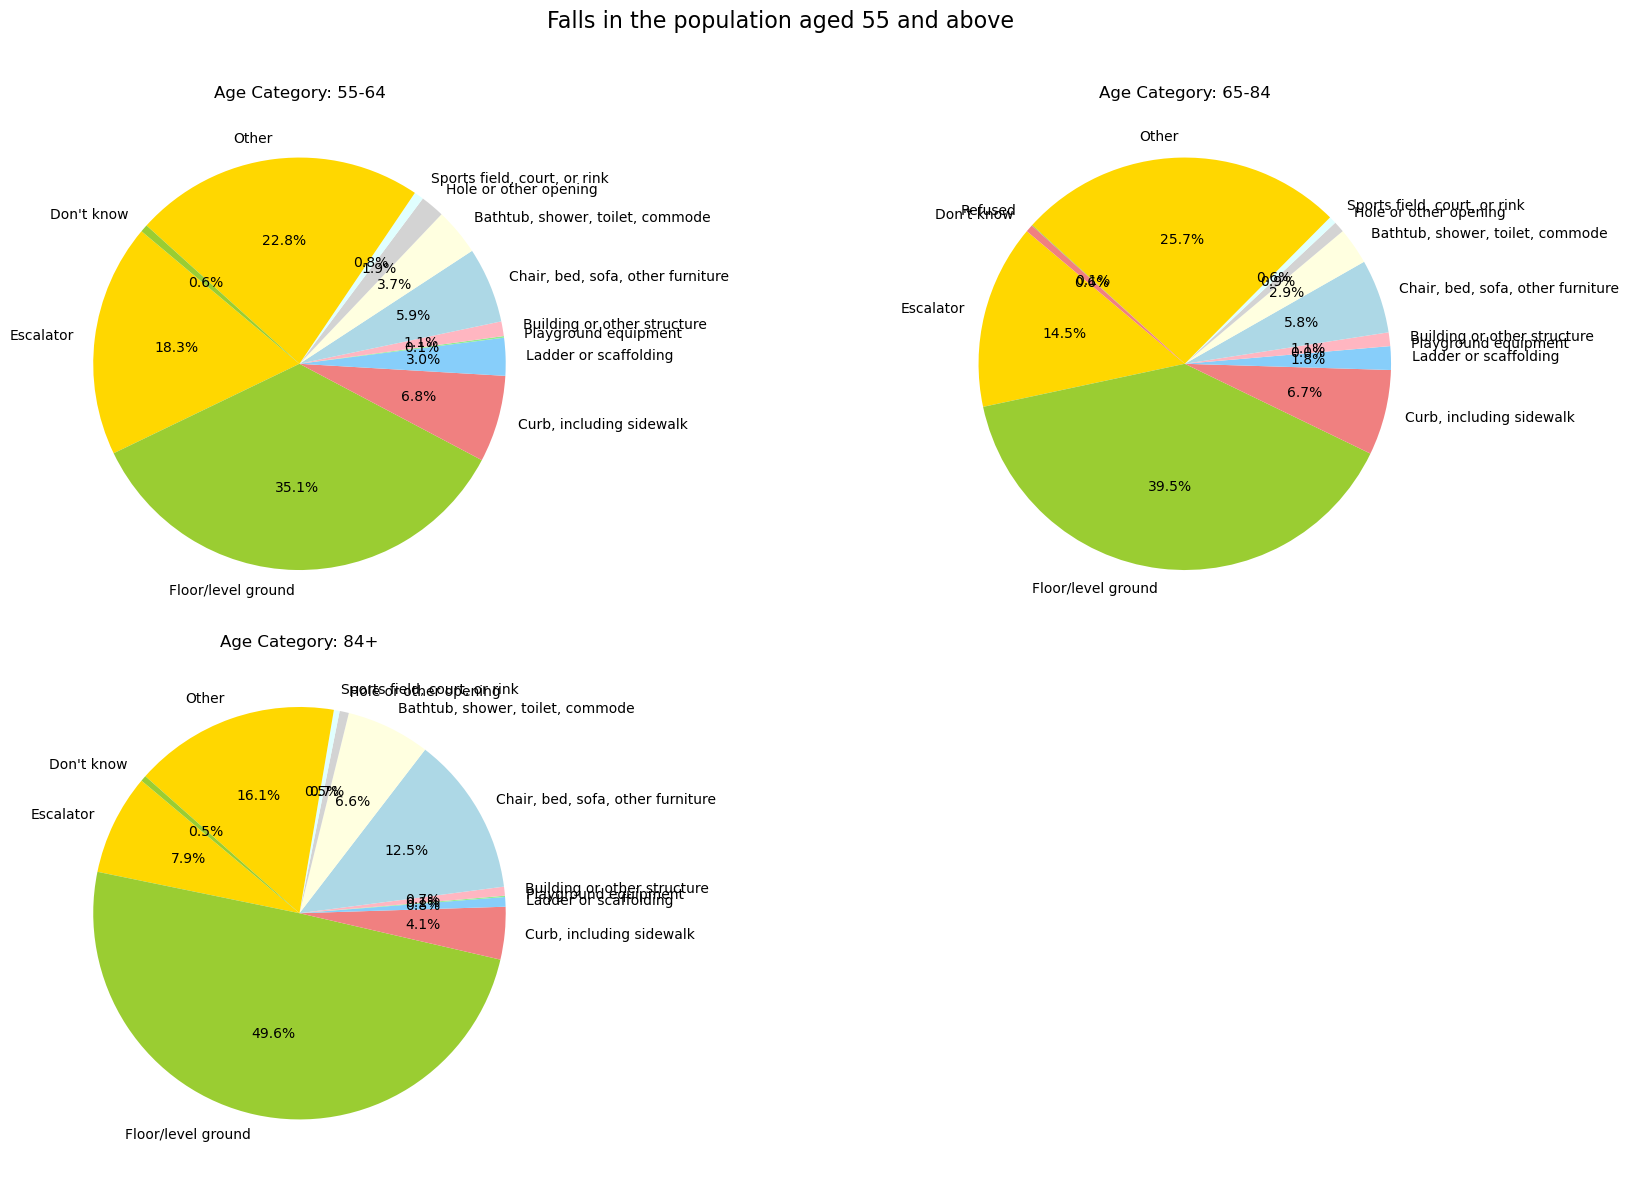

In [10]:
irfall1_labels = {
    1: "Escalator",
    2: "Floor/level ground",
    3: "Curb, including sidewalk",
    4: "Ladder or scaffolding",
    5: "Playground equipment",
    6: "Building or other structure",
    7: "Chair, bed, sofa, other furniture",
    8: "Tree",
    9: "Bathtub, shower, toilet, commode",
    10: "Swimming pool",
    11: "Hole or other opening",
    12: "Sports field, court, or rink",
    13: "Other",
    97: "Refused",
    98: "Not ascertained",
    99: "Don't know"
}

selected_age_categories = ["55-64", "65-84", "84+"]
overall_title = "Falls in the population aged 55 and above"

# figure to hold all the pie charts with increased size
plt.figure(figsize=(18, 12))
plt.suptitle(overall_title, fontsize=16)

# Defined colors for the pie charts
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue', 'lightyellow', 'lightgray', 'lightcyan']

# Looped through the selected age categories to create and display pie charts
for age_category in selected_age_categories:
    # Filtered the DataFrame to get data for the current age category
    age_data = df[df['AgeCategory'] == age_category]
    weighted_counts = {}

    # Calculated the weighted counts for each IRFALL1 category 
    for irfall1_category, irfall1_label in irfall1_labels.items():
        total_weight = age_data[age_data['IRFALL1'] == irfall1_category]['HHWEIGHT'].sum()
        weighted_counts[irfall1_label] = total_weight

    weighted_counts = {label: count for label, count in weighted_counts.items() if count > 0}

    #pie chart
    if weighted_counts:
        plt.subplot(2, 2, selected_age_categories.index(age_category) + 1)
        plt.pie(weighted_counts.values(), labels=weighted_counts.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Age Category: {age_category}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### People over the age of 55 fell or were injured on the floor or an escalator

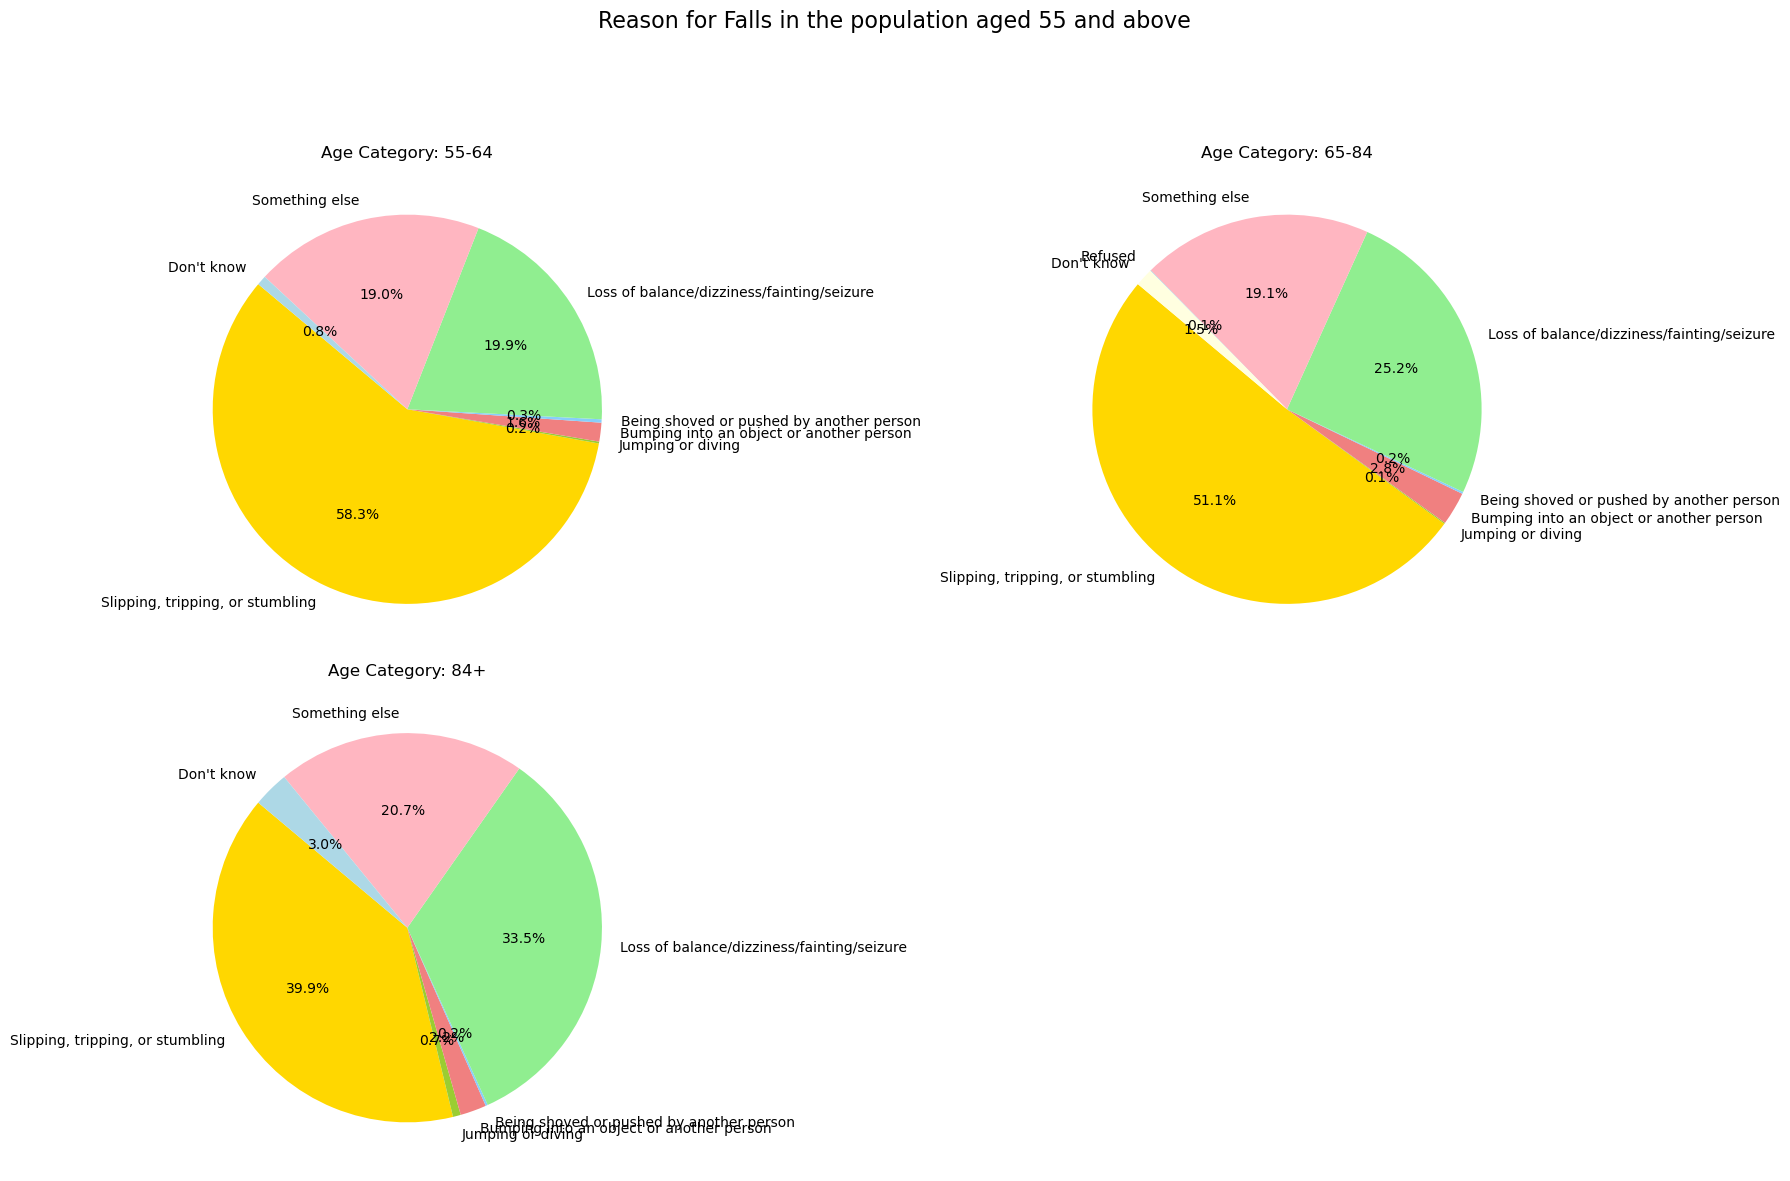

In [11]:
irfallwhy_labels = {
    1: "Slipping, tripping, or stumbling",
    2: "Jumping or diving",
    3: "Collision with/pushing, shoving by other person",
    4: "Bumping into an object or another person",
    5: "Being shoved or pushed by another person",
    6: "Loss of balance/dizziness/fainting/seizure",
    7: "Something else",
    97: "Refused",
    98: "Not ascertained",
    99: "Don't know"
}

selected_age_categories = ["55-64", "65-84", "84+"]
overall_title = "Reason for Falls in the population aged 55 and above"

# figure to hold all the pie charts with increased size
plt.figure(figsize=(18, 12))
plt.suptitle(overall_title, fontsize=16)


# Looped through the selected age categories to create and display pie charts
for age_category in selected_age_categories:
    # Filtered the DataFrame to get data for the current age category
    age_data = df[df['AgeCategory'] == age_category]
    weighted_counts = {}

    # Calculated the weighted counts for each IRFALL1 category 
    for irfallwhy_category, irfallwhy_label in irfallwhy_labels.items():
        total_weight = age_data[age_data['IRFALLWHY'] == irfallwhy_category]['HHWEIGHT'].sum()
        weighted_counts[irfallwhy_label] = total_weight

    weighted_counts = {label: count for label, count in weighted_counts.items() if count > 0}

    #pie chart
    if weighted_counts:
        plt.subplot(2, 2, selected_age_categories.index(age_category) + 1)
        plt.pie(weighted_counts.values(), labels=weighted_counts.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Age Category: {age_category}")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


### Slipping, tripping and loss of balance are the most common causes of falls or injuries in people over the age of 55

<Figure size 1000x600 with 0 Axes>

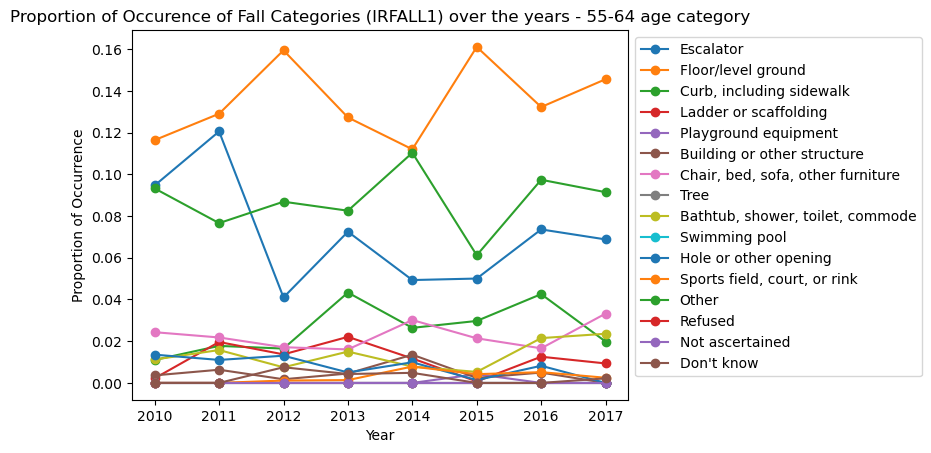

<Figure size 1000x600 with 0 Axes>

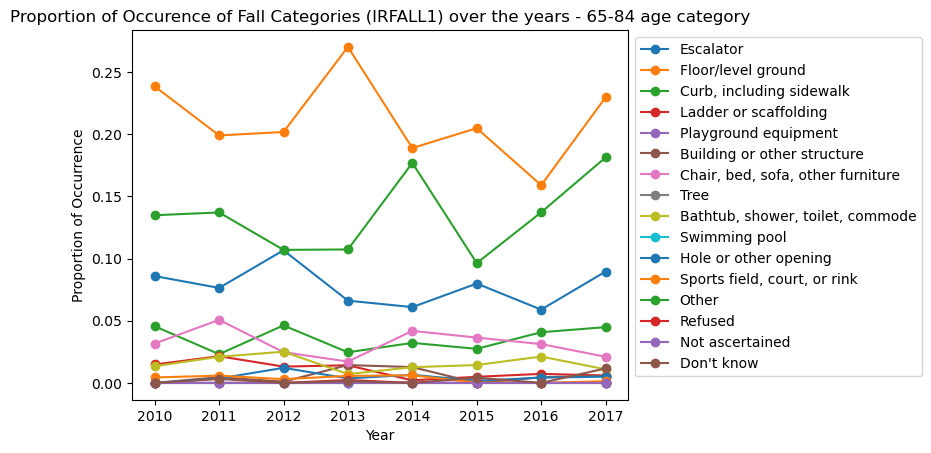

<Figure size 1000x600 with 0 Axes>

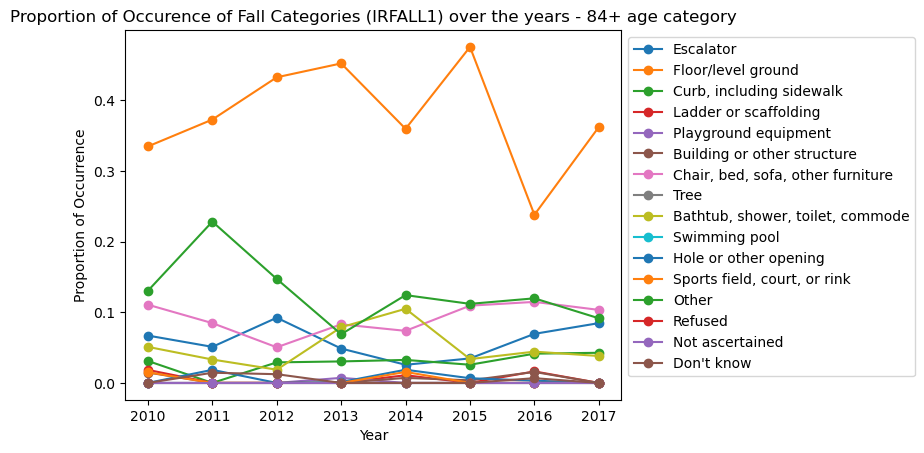

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Disabled FutureWarning for deprecated frame.append method
warnings.simplefilter(action='ignore', category=FutureWarning)

age_categories = ['55-64', '65-84', '84+']

# line chart for each age category
for age_category in age_categories:
    # DataFrame to store the data for the chart
    chart_data = pd.DataFrame(columns=['YEAR'] + list(irfall1_labels.values()))

    # weighted average for each IRFALL1 category in each year for the current age category
    age_group_data = df[(df['AgeCategory'] == age_category) & (df['YEAR'] >= 2010)]
    for year in age_group_data['YEAR'].unique():
        year_data = age_group_data[age_group_data['YEAR'] == year]

        # weighted average for each IRFALL1 category
        weighted_avg = {}
        total_weight = year_data['HHWEIGHT'].sum()
        for irfall1, label in irfall1_labels.items():
            weighted_sum = (year_data[year_data['IRFALL1'] == irfall1]['HHWEIGHT']).sum()
            weighted_avg[label] = weighted_sum / total_weight

        # dictionary for the row data with category labels
        row_data = {'YEAR': year}
        for irfall1, label in irfall1_labels.items():
            row_data[label] = weighted_avg[label]
        
        chart_data = chart_data.append(row_data, ignore_index=True)

    # YEAR column as the index
    chart_data.set_index('YEAR', inplace=True)

 
    plt.figure(figsize=(10, 6))
    ax = chart_data.plot(kind='line', marker='o')

  
    plt.title(f"Proportion of Occurence of Fall Categories (IRFALL1) over the years - {age_category} age category")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Occurrence")

  
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


Trend of occurence of falls over the years.
- Falls caused by furniture and the ground/floor have increased in people aged 55 to 64. This shows that a greater emphasis on furniture safety and decreasing tripping hazards on floors could be beneficial.
- Ground/floor falls consistently accounted for the largest proportion of falls among those aged 65-84 and 84+. This highlights the importance of ground and floor surfaces in adult fall prevention.

<Figure size 1000x600 with 0 Axes>

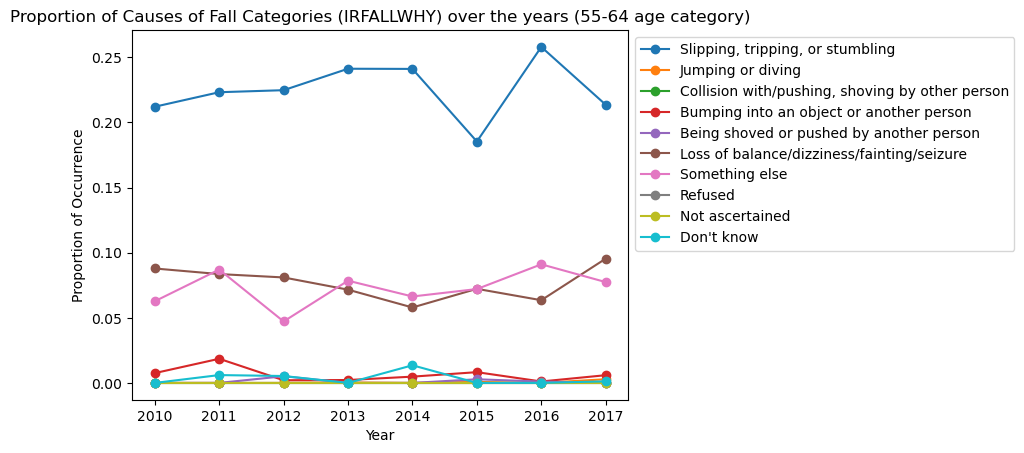

<Figure size 1000x600 with 0 Axes>

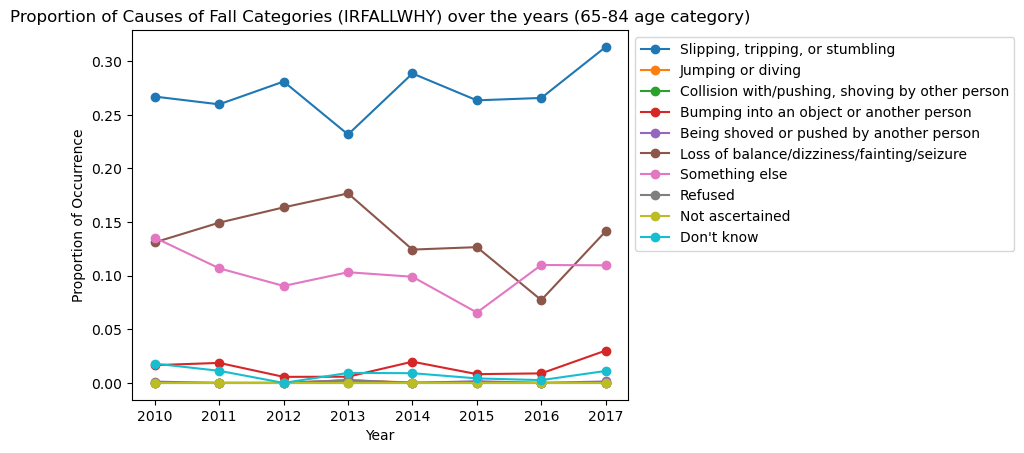

<Figure size 1000x600 with 0 Axes>

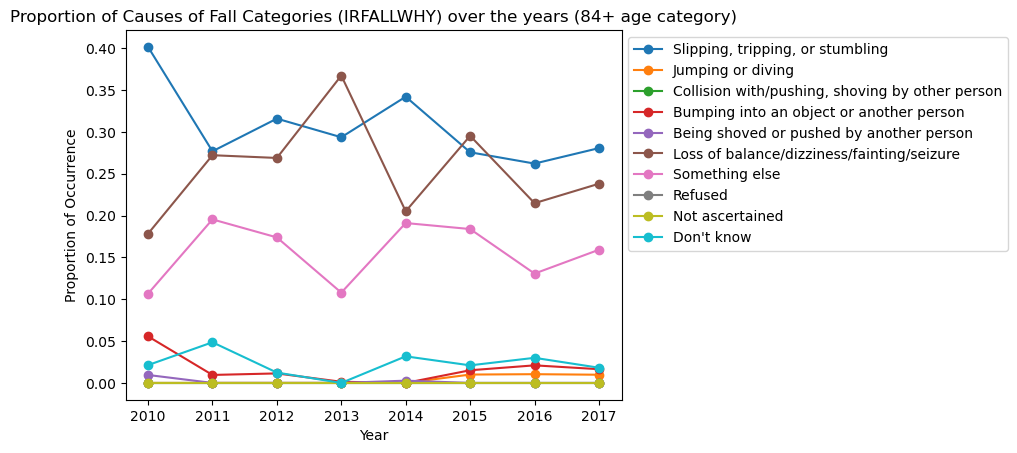

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Age categories
age_categories = ['55-64', '65-84', '84+']

# Line chart for each age category
for age_category in age_categories:
    # DataFrame to store the data for the chart
    chart_data = pd.DataFrame(columns=['YEAR'] + list(irfallwhy_labels.values()))

    # Weighted average for each reason in each year for the current age category
    age_group_data = df[(df['AgeCategory'] == age_category) & (df['YEAR'] >= 2010)]
    for year in age_group_data['YEAR'].unique():
        year_data = age_group_data[age_group_data['YEAR'] == year]

        # Weighted average for each reason
        weighted_avg = {}
        total_weight = year_data['HHWEIGHT'].sum()
        for irfallwhy, label in irfallwhy_labels.items():
            weighted_sum = (year_data[year_data['IRFALLWHY'] == irfallwhy]['HHWEIGHT']).sum()
            weighted_avg[label] = weighted_sum / total_weight

        # Dictionary for the row data with reason labels
        row_data = {'YEAR': year}
        for irfallwhy, label in irfallwhy_labels.items():
            row_data[label] = weighted_avg[label]

        chart_data = chart_data.append(row_data, ignore_index=True)

    # YEAR column as the index
    chart_data.set_index('YEAR', inplace=True)

    plt.figure(figsize=(10, 6))
    ax = chart_data.plot(kind='line', marker='o')

    plt.title(f"Proportion of Causes of Fall Categories (IRFALLWHY) over the years ({age_category} age category)")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Occurrence")

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


Trend of causes of falls over the years.
- For all senior age groups, loss of balance and tripping/slipping were consistently the top reasons over the years. This highlights that improving balance and stability should be a primary focus for reducing falls in the senior population. 

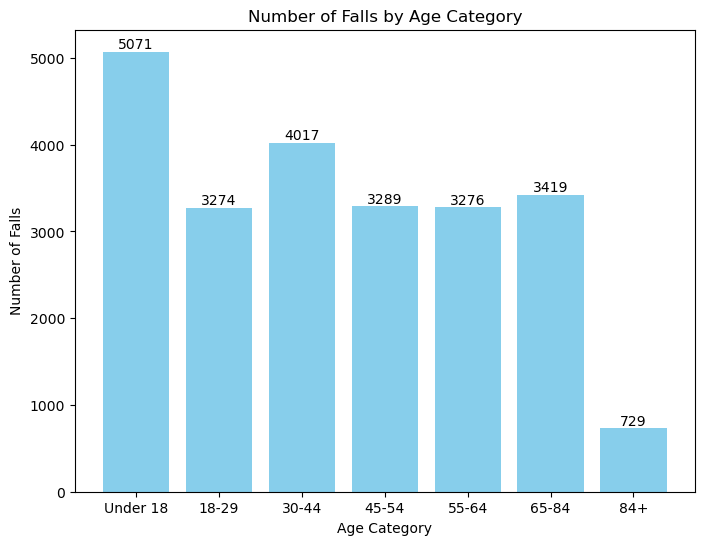

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with age categories and the count of falls in each category
age_categories = ["Under 18", "18-29", "30-44", "45-54", "55-64", "65-84", "84+"]
fall_counts = []

for age_category in age_categories:
    count = len(df[df['AgeCategory'] == age_category])
    fall_counts.append(count)

plt.figure(figsize=(8, 6))
bars = plt.bar(age_categories, fall_counts, color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Number of Falls')
plt.title('Number of Falls by Age Category')

for bar, count in zip(bars, fall_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center', va='bottom')

plt.show()


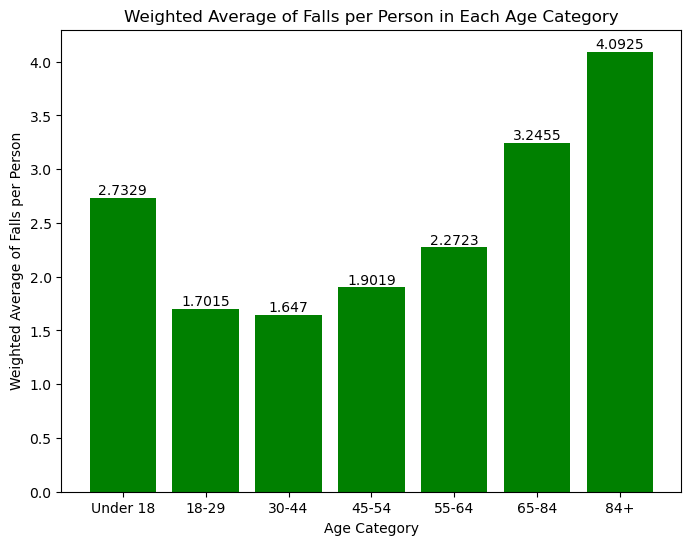

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with age categories and the weighted average of falls per person in each category
age_categories = ["Under 18", "18-29", "30-44", "45-54", "55-64", "65-84", "84+"]
weighted_avg_falls_per_person = []

for age_category in age_categories:
    age_data = df[df['AgeCategory'] == age_category]
    
    # number of falls in the age category
    fall_count = (age_data['IRFALL1'] * age_data['HHWEIGHT']).sum()
    
    # total number of people in the age category
    total_weight = age_data['HHWEIGHT'].sum()
    
    # falls per person in the age category
    falls_per_person = fall_count / total_weight
    
    weighted_avg_falls_per_person.append(falls_per_person)

plt.figure(figsize=(8, 6))
bars = plt.bar(age_categories, weighted_avg_falls_per_person, color='green')
plt.xlabel('Age Category')
plt.ylabel('Weighted Average of Falls per Person')
plt.title('Weighted Average of Falls per Person in Each Age Category')

for bar, weighted_avg in zip(bars, weighted_avg_falls_per_person):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, round(weighted_avg, 4), ha='center', va='bottom')

plt.show()


- the rate of falls per person increase with age
- "65-84" and "84+"-higher rates of falls per person
- elderls are more susceptible to falls.

